# Filtering and Restoring of Mixed and Noise Polluted Audio Samples Using Different Approaches

# 5. Adaptive Filter

## Load Edited Audio Samples

In [1]:
import os
import soundfile as sf
import numpy as np

inp_mixed_folder = 'mixed_signals'
inp_folder = 'audio_samples'
filter_folder = 'filter_samples'

Load Original Audio Files

In [2]:
file_names = ['speech.wav', 'street.wav', 'music.wav', 'white_noise.wav']

audio_speech, sr_speech = sf.read(os.path.join(inp_folder, file_names[0]))
audio_street, sr_street = sf.read(os.path.join(inp_folder, file_names[1]))
audio_music, sr_music = sf.read(os.path.join(inp_folder, file_names[2]))
audio_wnoise, sr_wnoise = sf.read(os.path.join(inp_folder, file_names[3]))
print("Array Type is: {}".format(audio_music.dtype))

audio_files = [audio_speech, audio_street, audio_music, audio_wnoise]
sample_rates = [sr_speech, sr_street, sr_music, sr_wnoise]

for name, sr, audio in zip(file_names, sample_rates, audio_files):
    print("File: {}, Sample Rate: {}, Samples: {}, Time: {}sec".format(name, sr, len(audio), len(audio)/sr))

Array Type is: float64
File: speech.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec
File: street.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec
File: music.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec
File: white_noise.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec


Load Mixed Signals

Generate four observations $d$. 

1. Music + White Noise $d_{m+wn}$
1. Street Noise + Music $d_{sn+m}$
1. Street Noise + Music + Speech $d_{sn+m+s}$
1. Speech + White Noise $d_{s+wn}$

In [3]:
file_names_obsv = ['music_wn.wav', 'street_music.wav', 'street_music_speech.wav', 'speech_wn.wav']

audio_m_wn, sr_m_wn = sf.read(os.path.join(inp_folder, file_names[0]))
audio_s_m, sr_s_m = sf.read(os.path.join(inp_folder, file_names[1]))
audio_s_m_sp, sr_s_m_sp = sf.read(os.path.join(inp_folder, file_names[2]))
audio_sp_wn, sr_sp_wn = sf.read(os.path.join(inp_folder, file_names[3]))
print("Array Type is: {}".format(audio_music.dtype))

observations = [audio_m_wn, audio_s_m, audio_s_m_sp, audio_sp_wn]
sample_rates_obsv = [sr_m_wn, sr_s_m, sr_s_m_sp, sr_sp_wn]
max_length = len(observations[0])

for name, sr, audio in zip(file_names_obsv, sample_rates_obsv, observations):
    print("File: {}, Sample Rate: {}, Samples: {}, Time: {}sec".format(name, sr, len(audio), len(audio)/sr))

Array Type is: float64
File: music_wn.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec
File: street_music.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec
File: street_music_speech.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec
File: speech_wn.wav, Sample Rate: 44100, Samples: 352800, Time: 8.0sec


# Adaptive Filter

In [4]:
import padasip as pa
import matplotlib.pyplot as plt

np.random.seed(10)

# Speech + White Noise $d_{s+wn}$

In [ ]:
samples = len(audio_files[0])
memory = 10
u = audio_files[0]
v = audio_files[3]
d = observations[3]

x = pa.input_from_history(d, memory)[:-1]
d = d[memory:]
u = u[memory:]
f = pa.filters.FilterRLS(mu=.5, n=memory)
y, e, w = f.run(d, x)

plt.figure(figsize=(12.5,6))
plt.plot(u, "r:", linewidth=4, label="original")
plt.plot(d, "b", label="noisy")
plt.plot(y, "g", label="filtered")
plt.xlim(60000, 60100)
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.tight_layout()
plt.grid()

(352799, 1)
352799


C:\Anaconda\envs\anc\lib\site-packages\padasip\misc\error_evaluation.py:149: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(e**2)


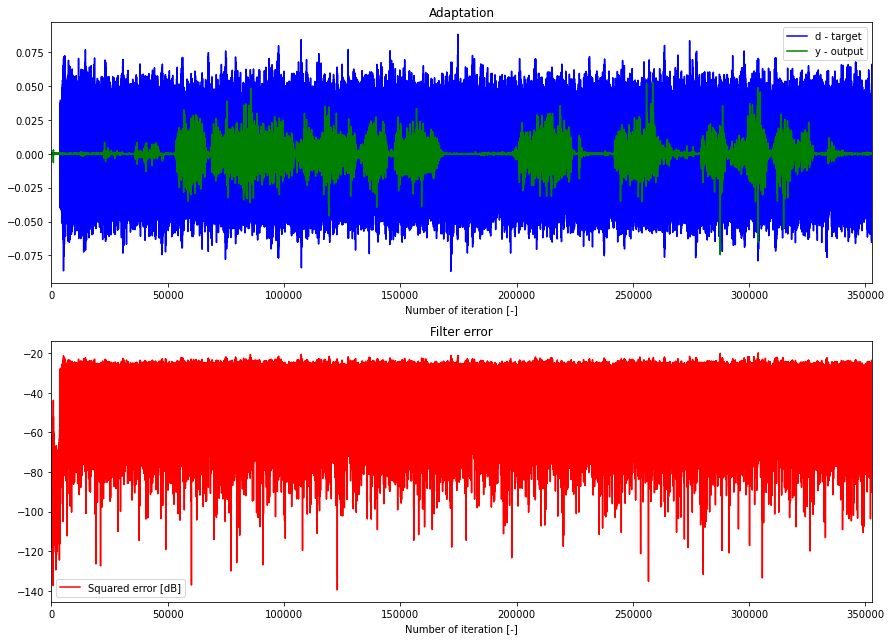

And the resulting coefficients are: [0.35363256]


In [32]:
x = pa.input_from_history(audio_files[0], 1)[:-1]
#x = audio_files[0]
d = observations[3][1:]
print(x.shape)
print(len(d))
f = pa.filters.FilterNLMS(n=1, mu=0.1, w="random")
y, e, w = f.run(d, x)

plt.figure(figsize=(12.5,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("Number of iteration [-]")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output")
plt.xlim(0, max_length)
plt.legend()

plt.subplot(212); plt.title("Filter error"); plt.xlabel("Number of iteration [-]")
plt.plot(pa.misc.logSE(e),"r", label="Squared error [dB]");plt.legend()
plt.xlim(0, max_length)
plt.tight_layout()
plt.show()
print("And the resulting coefficients are: {}".format(w[-1]))